In [226]:
# import statistical packages
import numpy as np
import pandas as pd

In [227]:
# import data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [228]:
# import Weekly data
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)

In [229]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [230]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [231]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [232]:
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])
Auto['hp'] = Auto['horsepower'].astype(float) # horsepower imports in my dataframe as string. So I convert it to float
Auto.drop(columns = 'horsepower', inplace = True)
Auto.reset_index(drop=True, inplace = True)

**11.a. Create a binary variable mpg01 with values > median of mpg as 1 and 0 otherwise**

In [233]:
mpg_median = Auto['mpg'].median()
mpg_median

22.75

In [234]:
mpg01 = pd.DataFrame(columns=['mpg01'])
Auto = pd.concat([mpg01, Auto], axis = 1)

In [235]:
Auto.head()

,mpg01,mpg,cylinders,displacement,weight,acceleration,year,origin,name,hp
0,NaN,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu,130.0
1,NaN,15.0,8,350.0,3693,11.5,70,1,buick skylark 320,165.0
2,NaN,18.0,8,318.0,3436,11.0,70,1,plymouth satellite,150.0
3,NaN,16.0,8,304.0,3433,12.0,70,1,amc rebel sst,150.0
4,NaN,17.0,8,302.0,3449,10.5,70,1,ford torino,140.0


In [236]:
index = Auto.index

In [237]:
for i in index:
    if Auto.iloc[i]['mpg'] > mpg_median:
        Auto.at[i, 'mpg01'] = int(1)
    else:
        Auto.at[i, 'mpg01'] = int(0)

In [238]:
Auto

,mpg01,mpg,cylinders,displacement,weight,acceleration,year,origin,name,hp
0,0,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu,130.0
1,0,15.0,8,350.0,3693,11.5,70,1,buick skylark 320,165.0
2,0,18.0,8,318.0,3436,11.0,70,1,plymouth satellite,150.0
3,0,16.0,8,304.0,3433,12.0,70,1,amc rebel sst,150.0
4,0,17.0,8,302.0,3449,10.5,70,1,ford torino,140.0
5,0,15.0,8,429.0,4341,10.0,70,1,ford galaxie 500,198.0
6,0,14.0,8,454.0,4354,9.0,70,1,chevrolet impala,220.0
7,0,14.0,8,440.0,4312,8.5,70,1,plymouth fury iii,215.0
8,0,14.0,8,455.0,4425,10.0,70,1,pontiac catalina,225.0
9,0,15.0,8,390.0,3850,8.5,70,1,amc ambassador dpl,190.0


In [239]:
Auto.mpg01.dtype

dtype('O')

In [240]:
Auto = pd.get_dummies(Auto, columns=['mpg01'], drop_first=True)

In [241]:
Auto

,mpg,cylinders,displacement,weight,acceleration,year,origin,name,hp,mpg01_1
0,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu,130.0,0
1,15.0,8,350.0,3693,11.5,70,1,buick skylark 320,165.0,0
2,18.0,8,318.0,3436,11.0,70,1,plymouth satellite,150.0,0
3,16.0,8,304.0,3433,12.0,70,1,amc rebel sst,150.0,0
4,17.0,8,302.0,3449,10.5,70,1,ford torino,140.0,0
5,15.0,8,429.0,4341,10.0,70,1,ford galaxie 500,198.0,0
6,14.0,8,454.0,4354,9.0,70,1,chevrolet impala,220.0,0
7,14.0,8,440.0,4312,8.5,70,1,plymouth fury iii,215.0,0
8,14.0,8,455.0,4425,10.0,70,1,pontiac catalina,225.0,0
9,15.0,8,390.0,3850,8.5,70,1,amc ambassador dpl,190.0,0


In [243]:
type(Auto.mpg01_1)

pandas.core.series.Series

In [244]:
cols = Auto[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'year', 'origin', 'hp']]

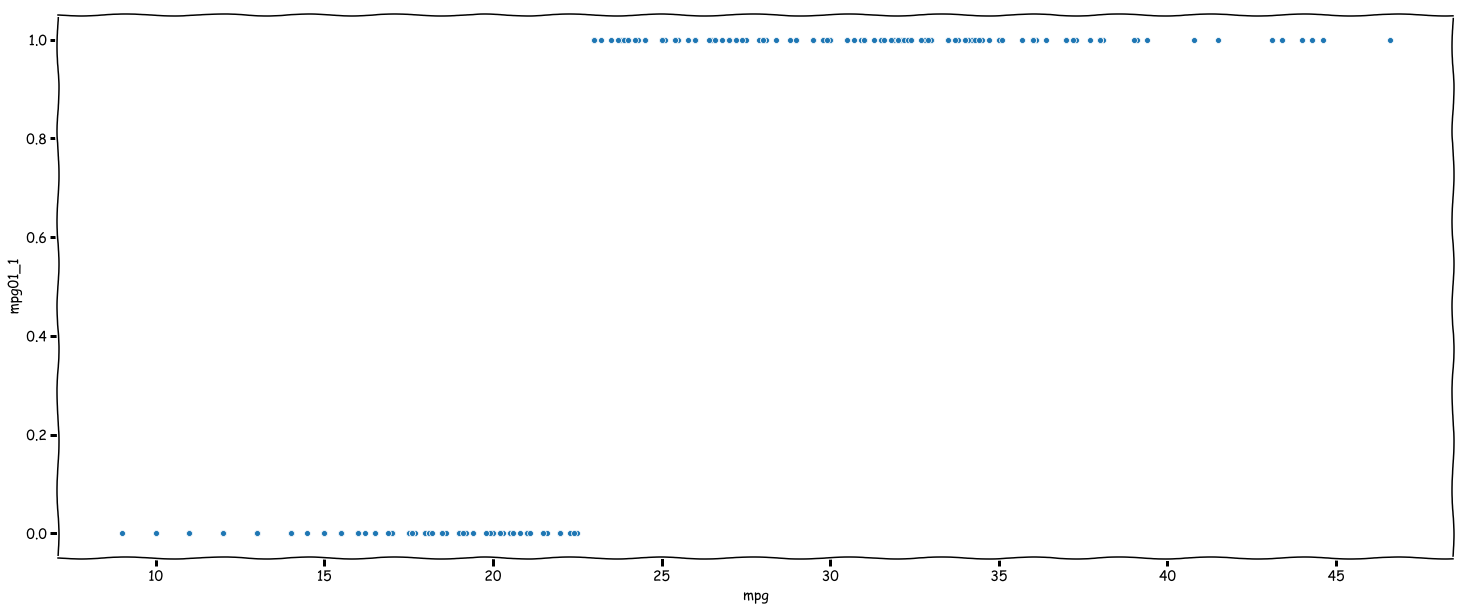

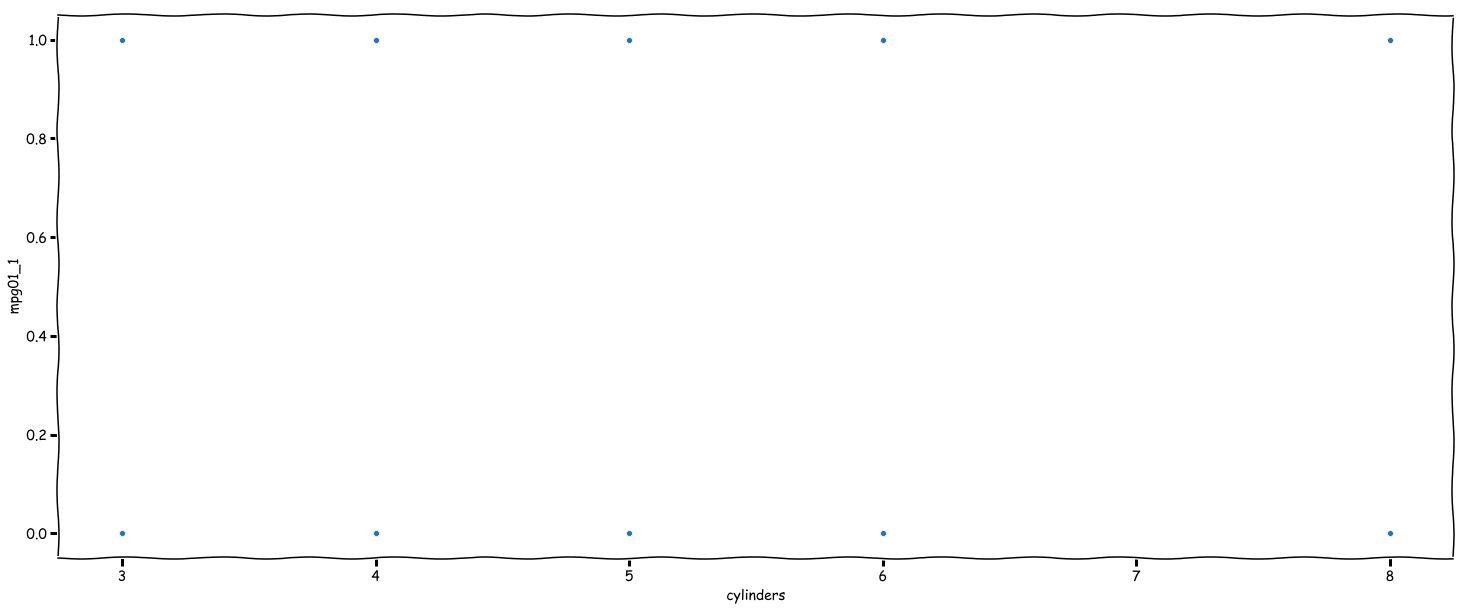

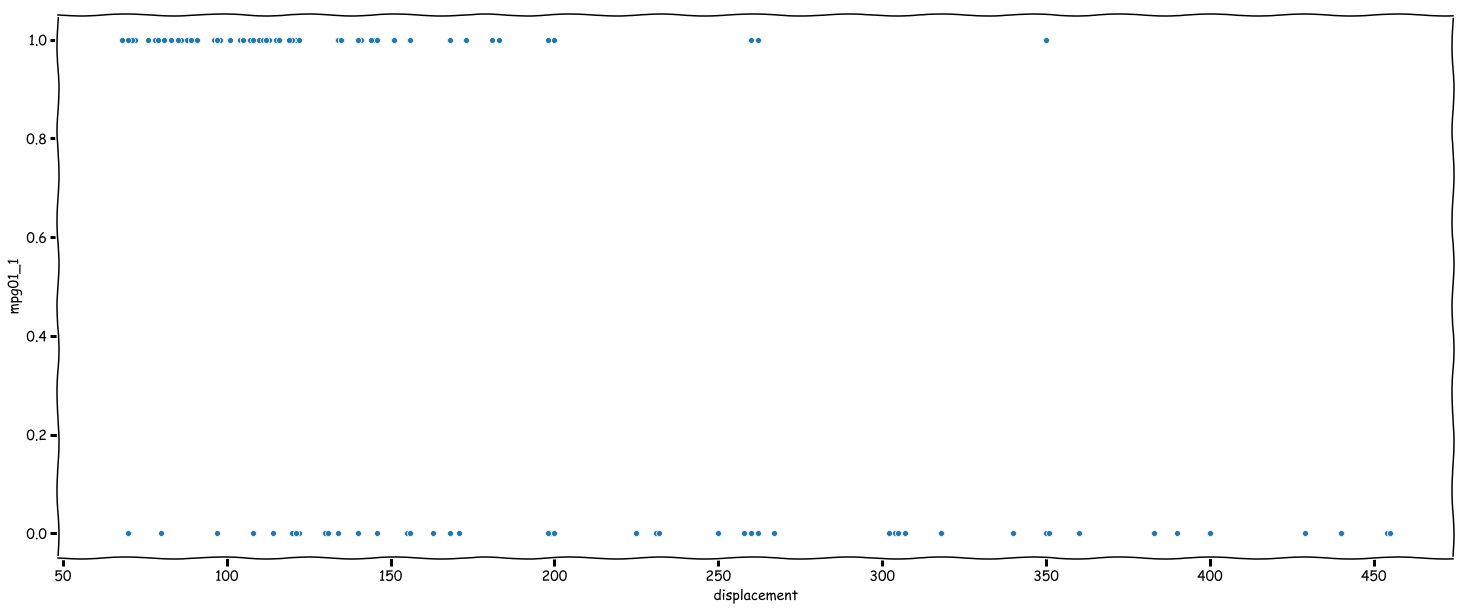

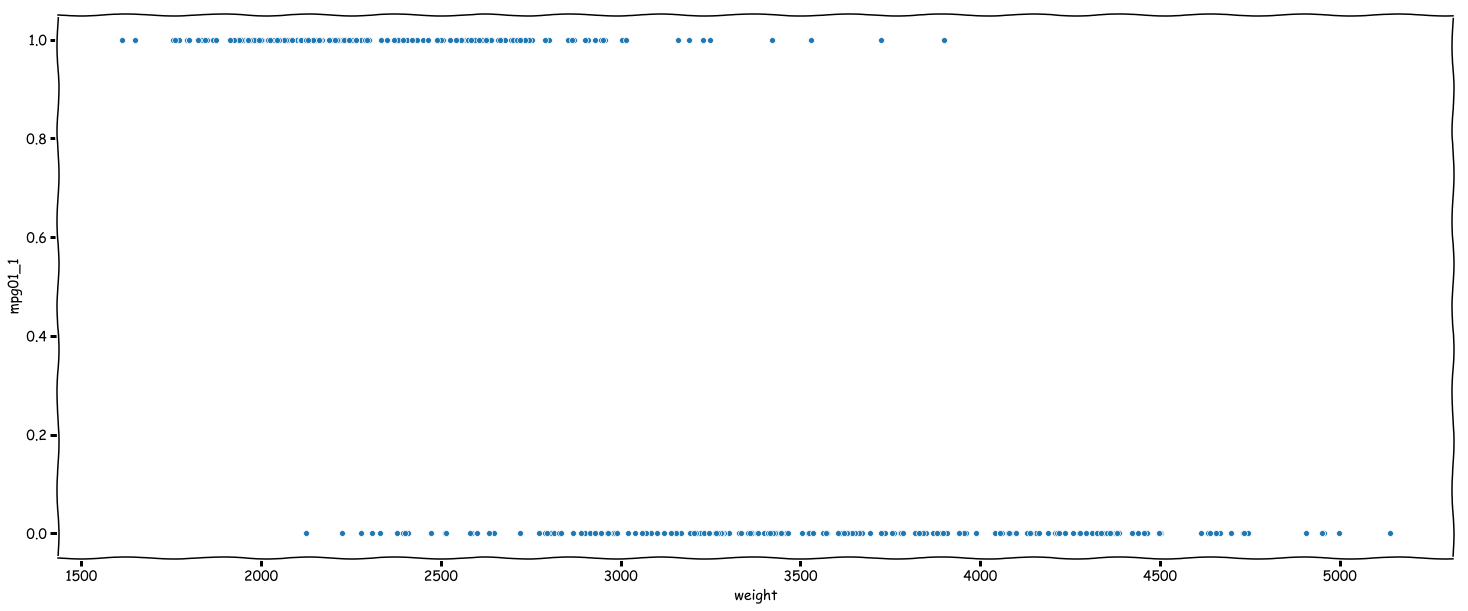

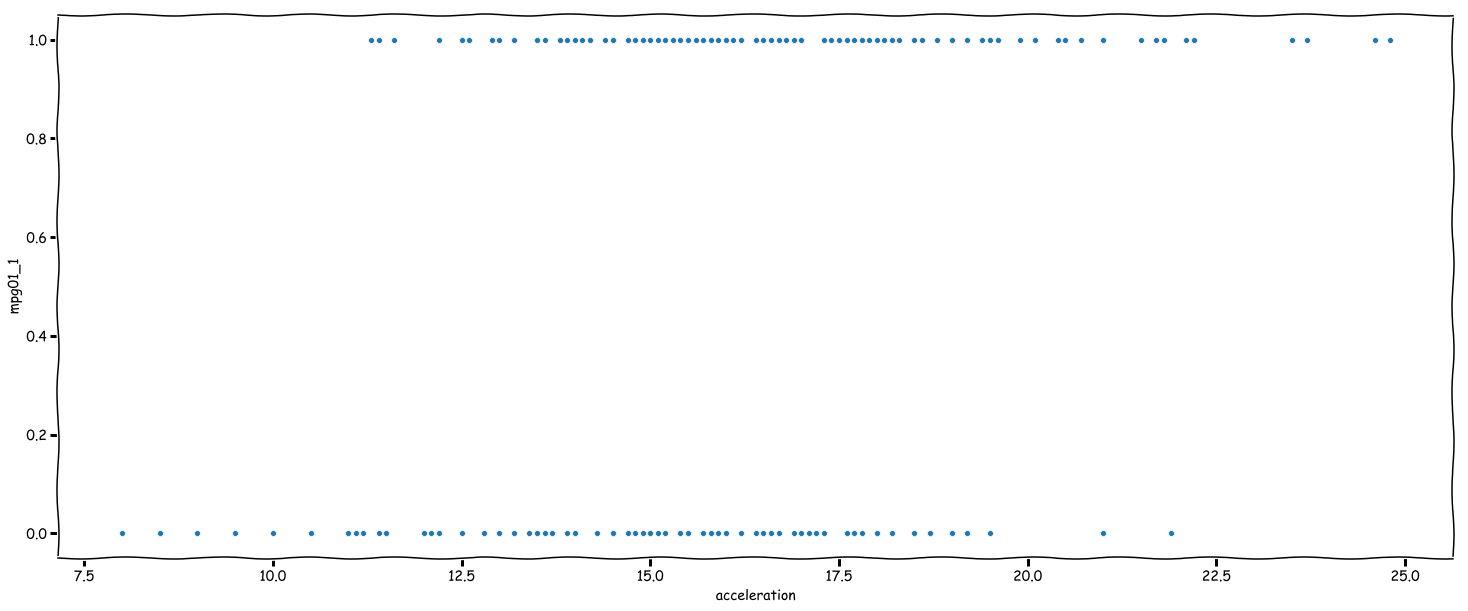

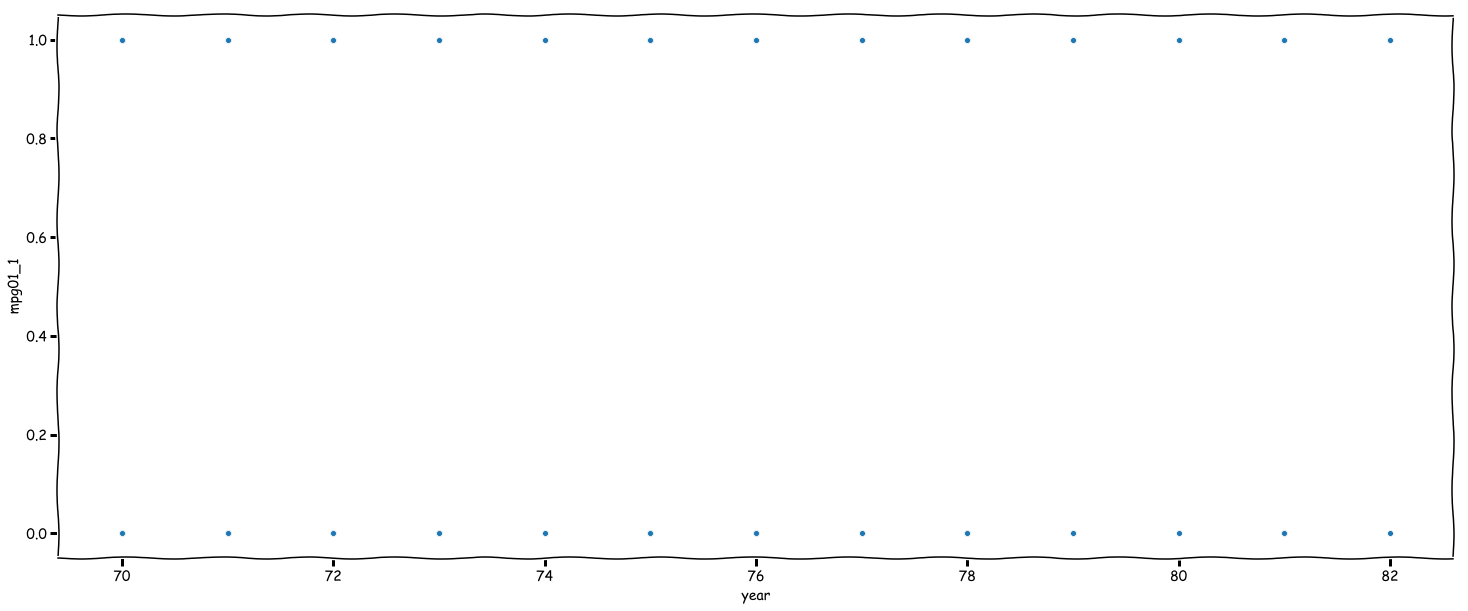

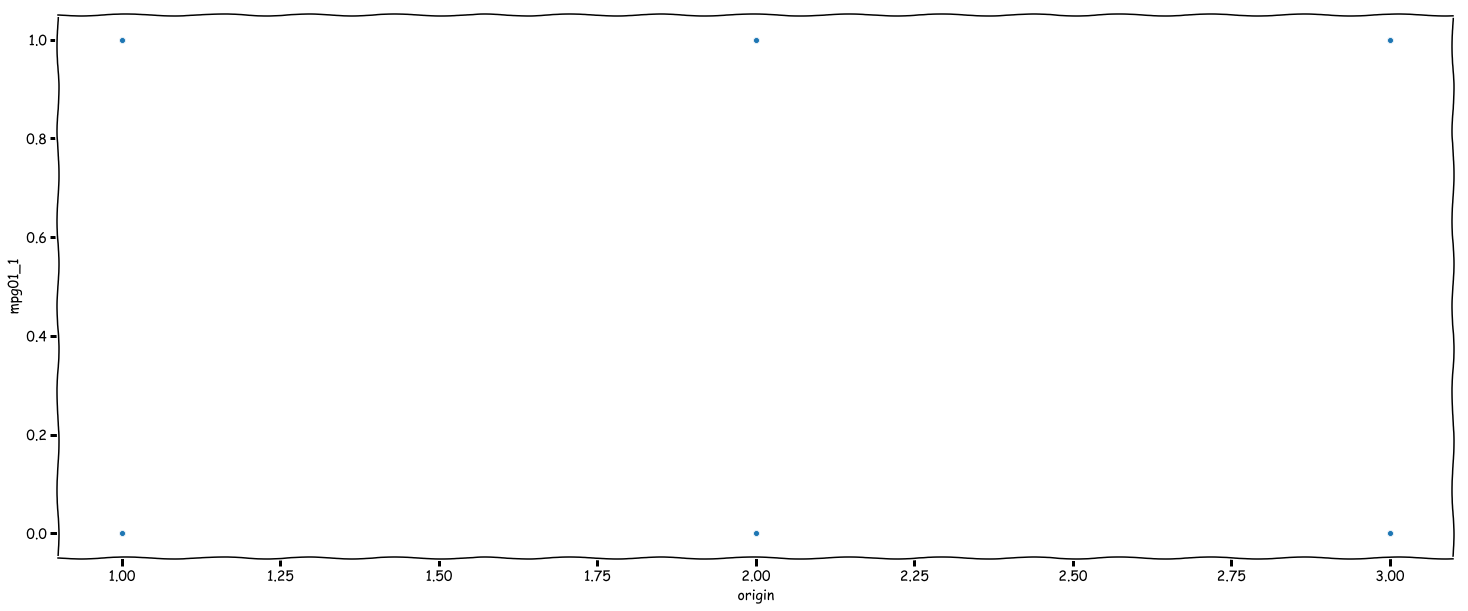

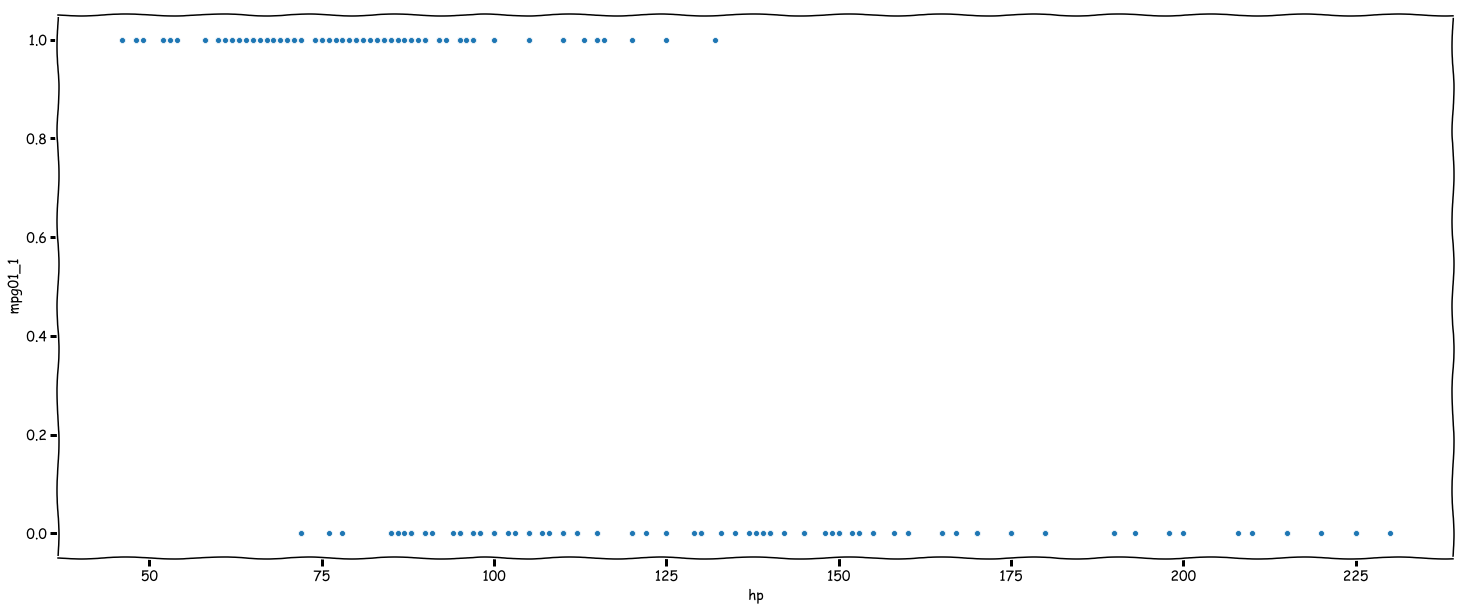

In [246]:
for i in cols:
    plt.xkcd()
    plt.figure(figsize = (25, 10))
    sns.scatterplot(y = Auto['mpg01_1'], x = Auto[i])

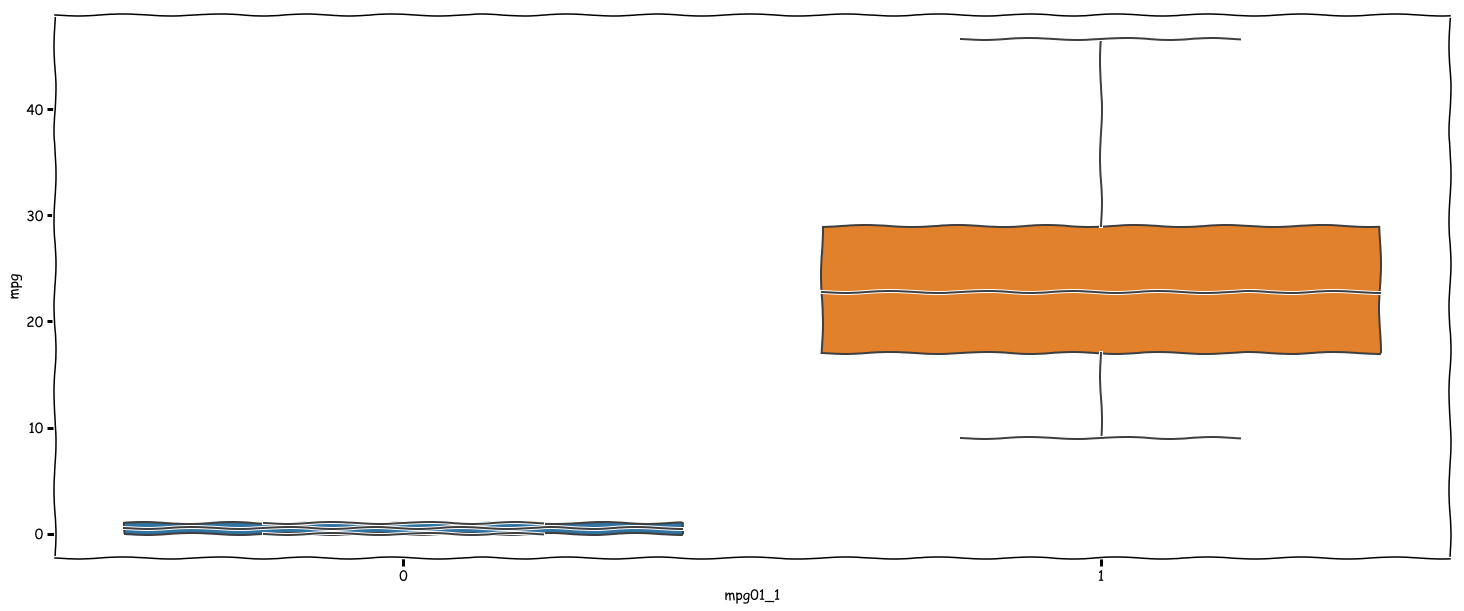

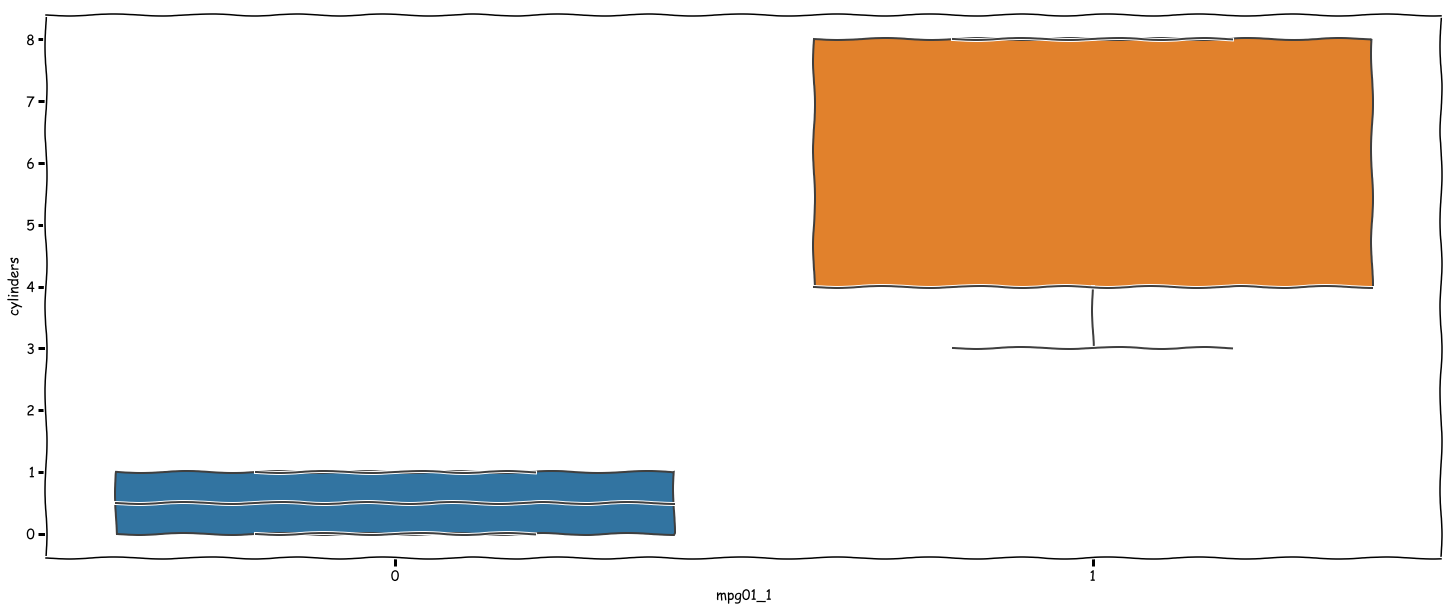

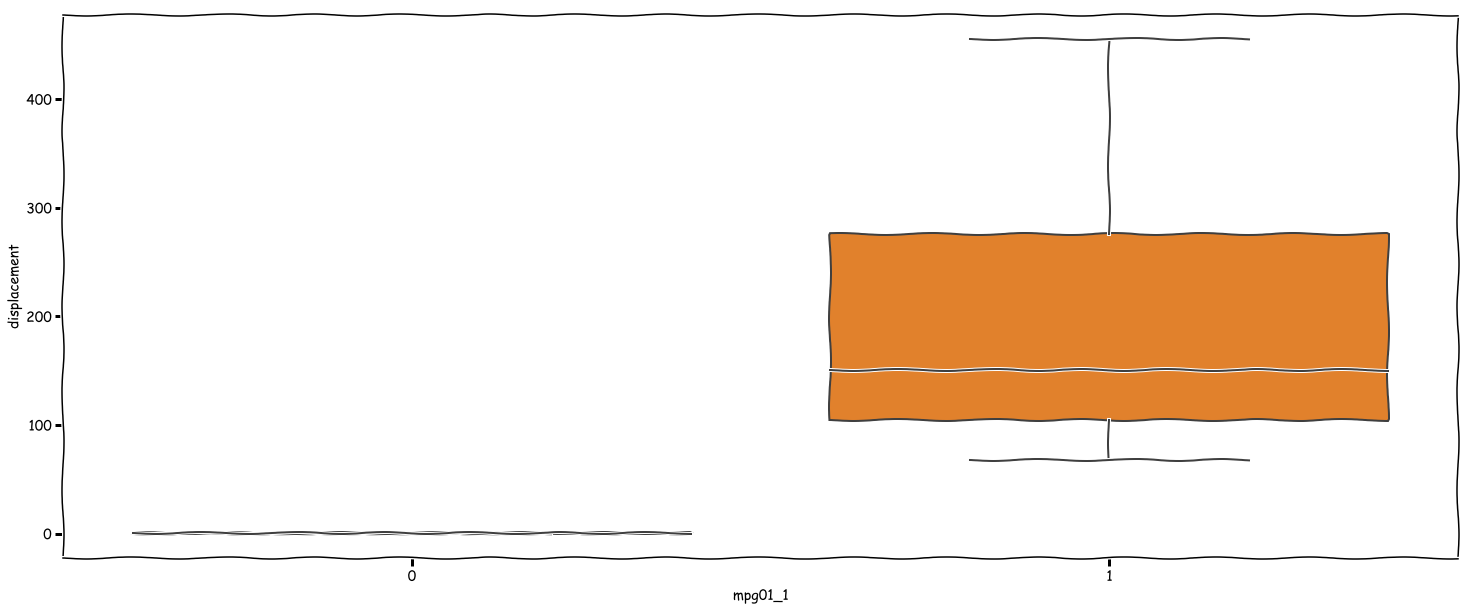

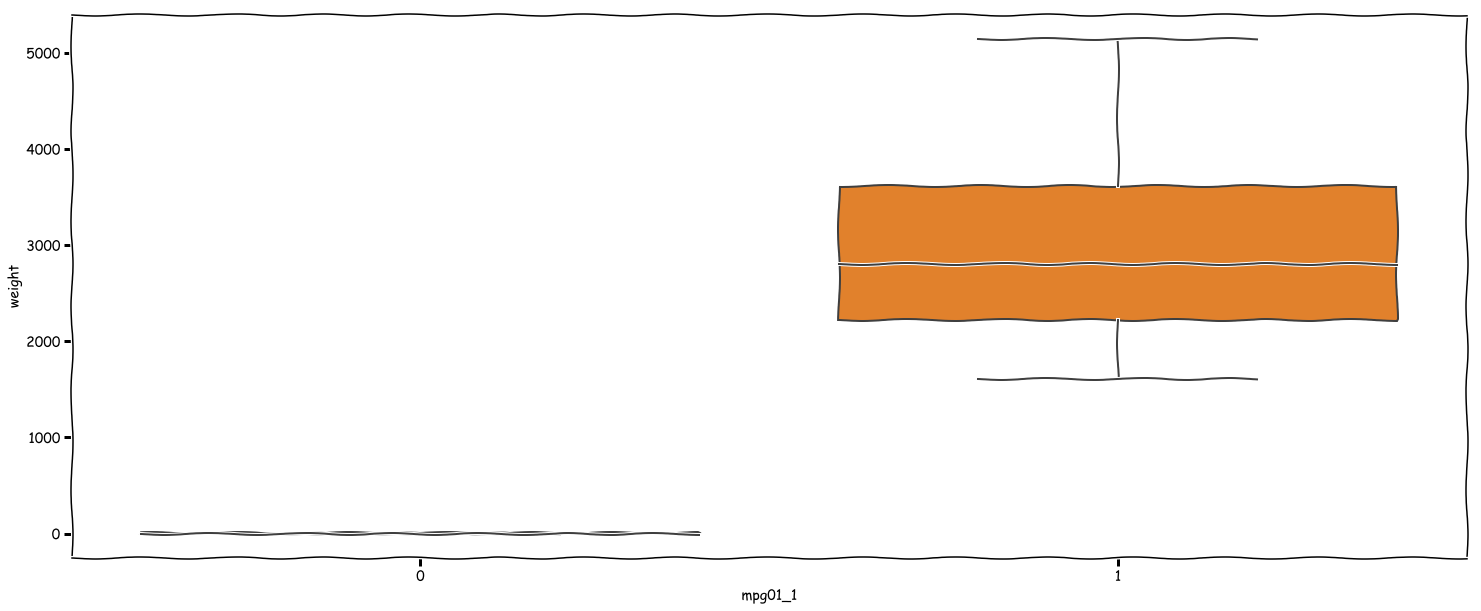

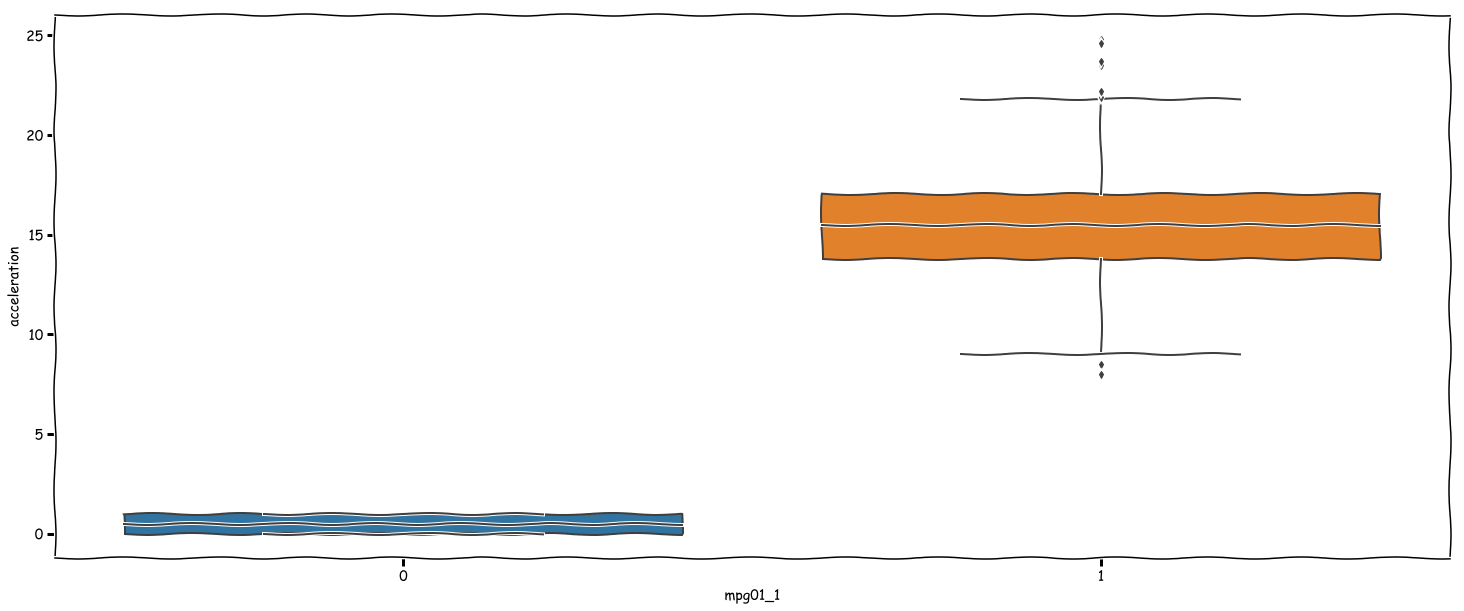

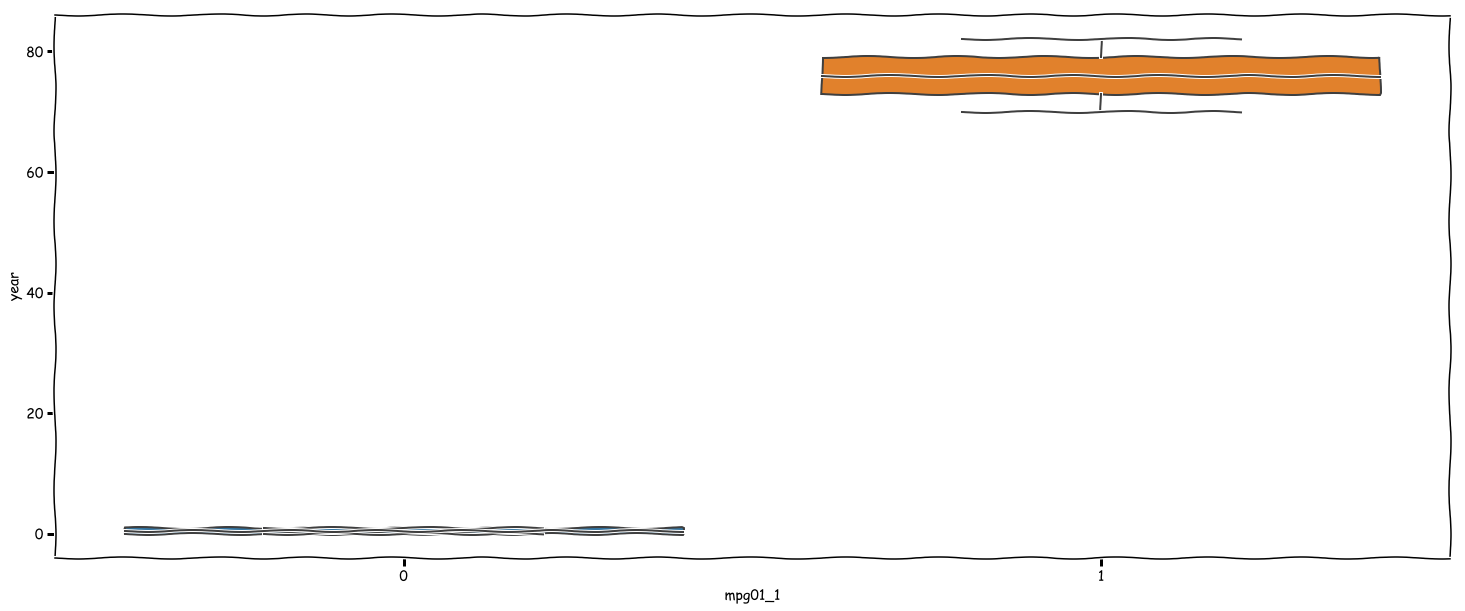

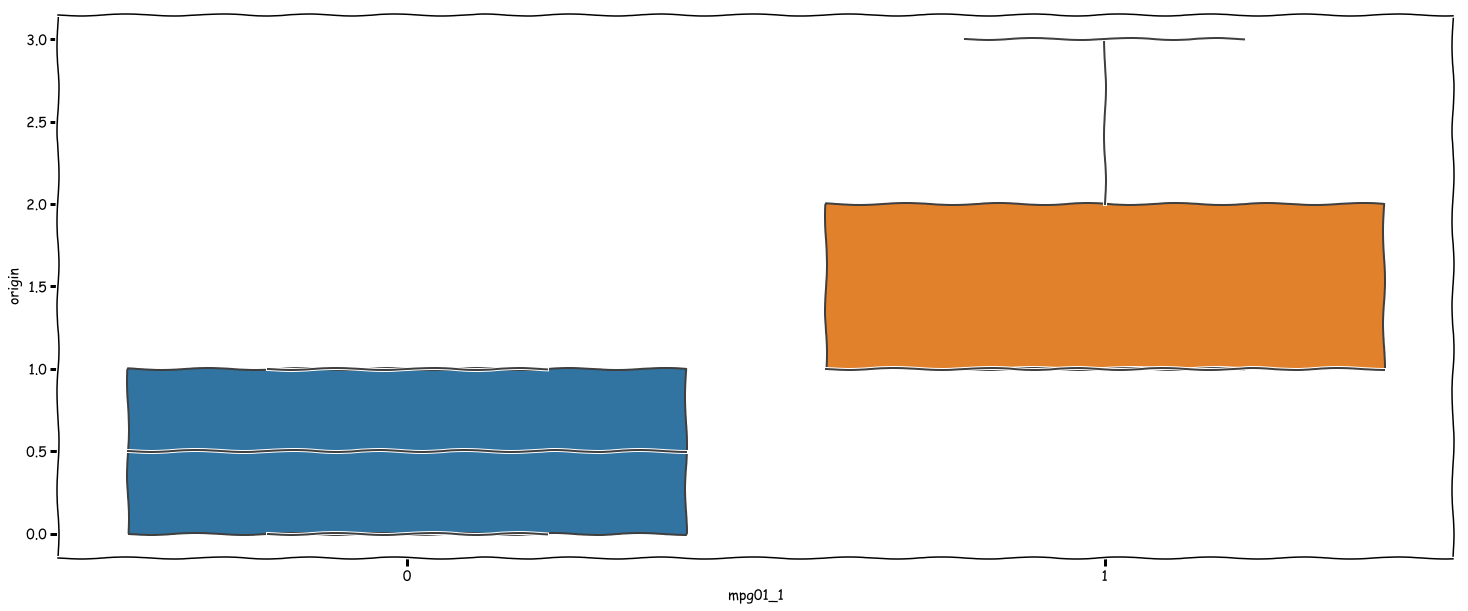

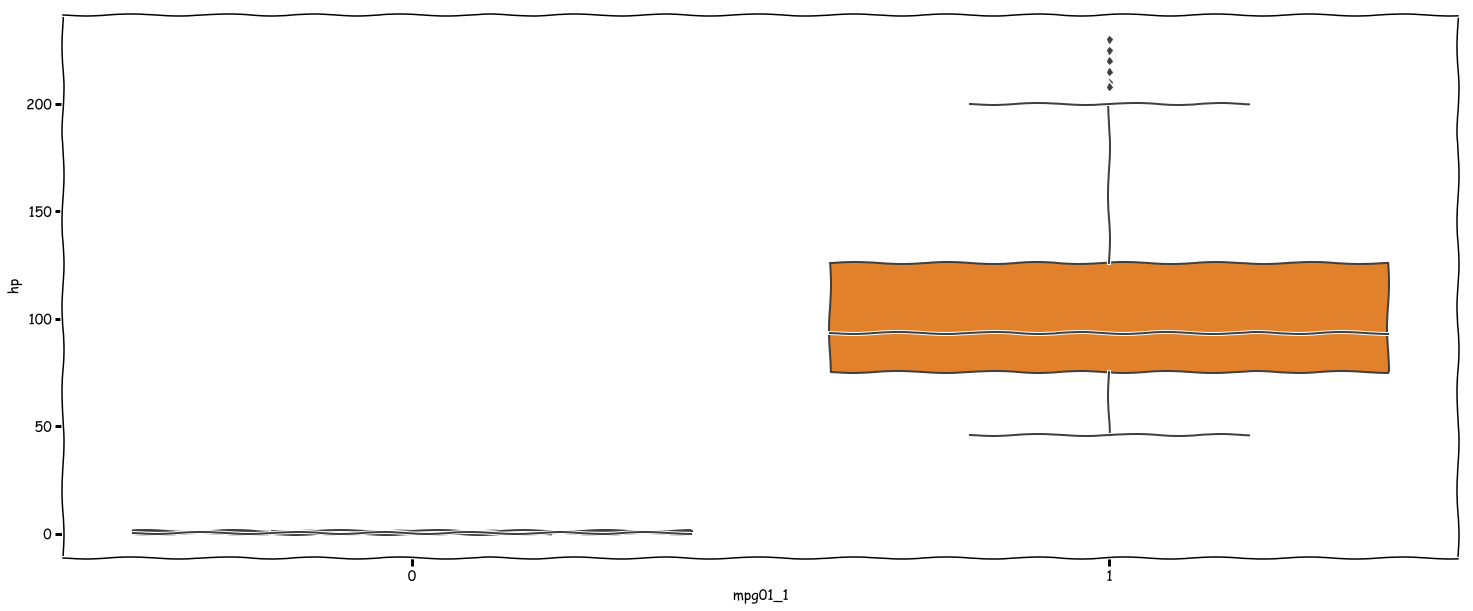

In [247]:
for i in cols:
    plt.xkcd()
    plt.figure(figsize = (25, 10))
    sns.boxplot(data = [Auto['mpg01_1'], Auto[i]])
    plt.ylabel(i)
    plt.xlabel('mpg01_1')

<Figure size 1800x720 with 0 Axes>

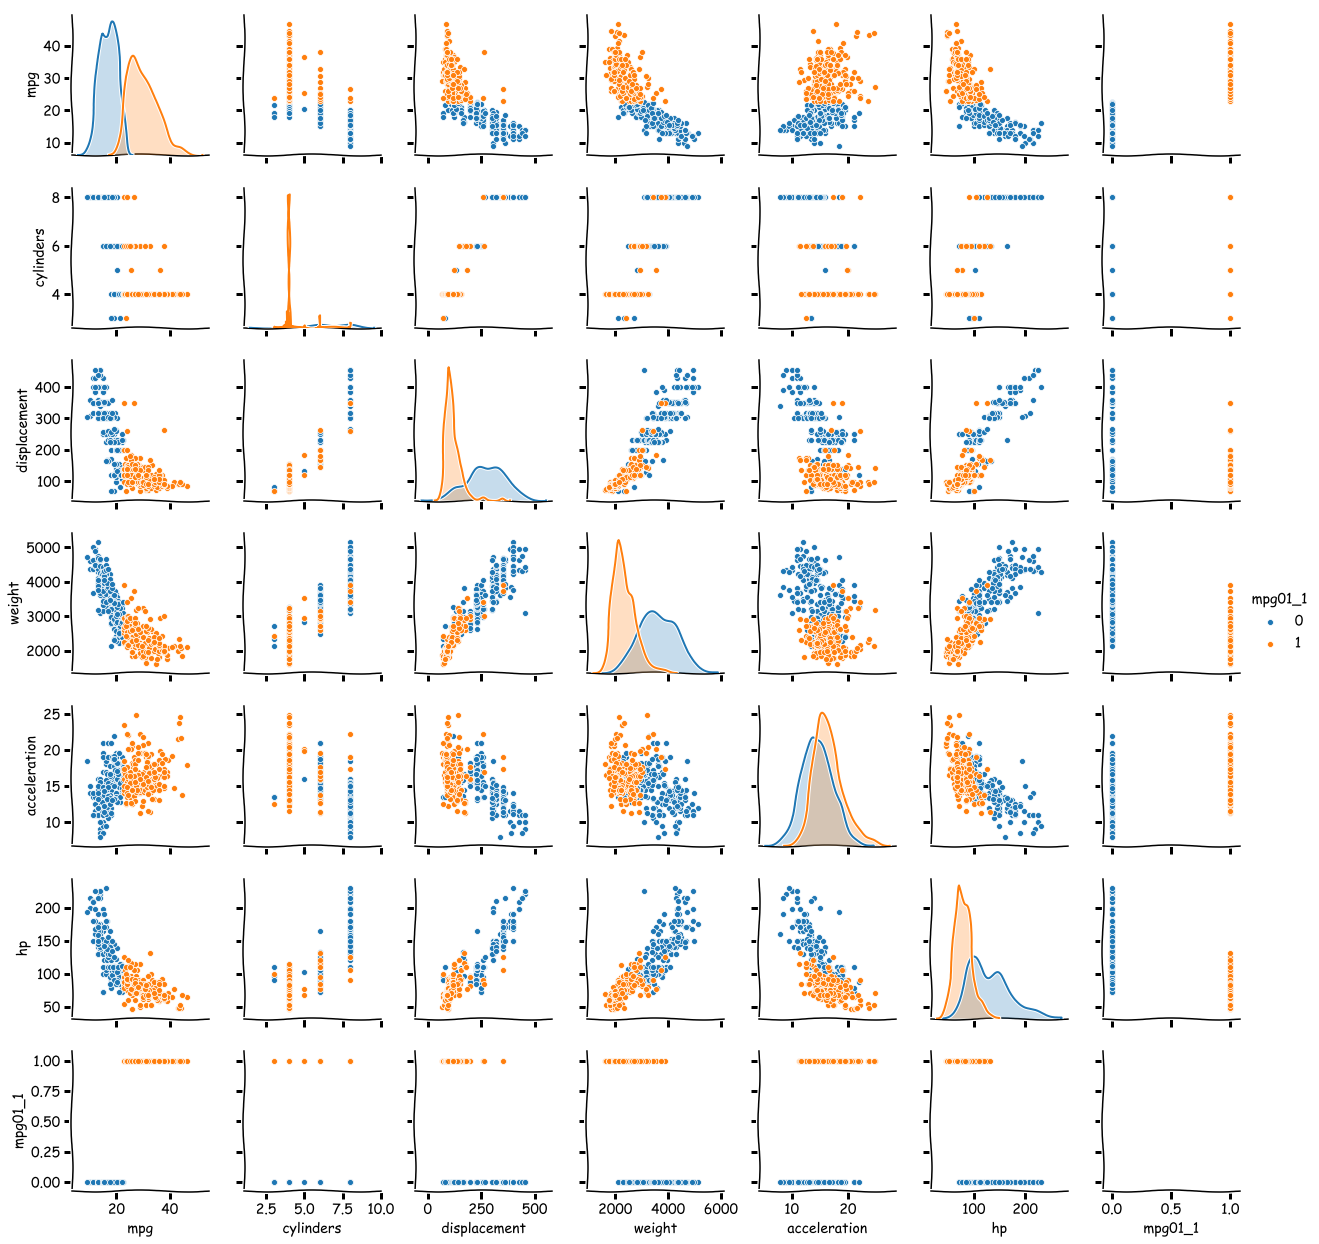

In [290]:
import warnings
warnings.simplefilter('ignore')
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.pairplot(Auto, hue = 'mpg01_1')

*There is a clear negative correlation between cylinders, weight, displacement and horsepower. There is a positive
correlation with acceleration.*

**11.c. Splitting data into training and test data**

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
Auto.drop(columns=['name', 'year', 'origin'], inplace=True) # deleting name since it does not contribute towards any modelling

In [251]:
Auto.head()

,mpg,cylinders,displacement,weight,acceleration,hp,mpg01_1
0,18.0,8,307.0,3504,12.0,130.0,0
1,15.0,8,350.0,3693,11.5,165.0,0
2,18.0,8,318.0,3436,11.0,150.0,0
3,16.0,8,304.0,3433,12.0,150.0,0
4,17.0,8,302.0,3449,10.5,140.0,0


In [252]:
X = Auto.drop(columns=['mpg01_1'])
y = Auto['mpg01_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**10.d. Linear Discriminant Analysis**

In [253]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [254]:
y_train.dtype

dtype('uint8')

In [255]:
ldafit = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [256]:
ldapred = ldafit.predict(X_test)

In [257]:
from sklearn.metrics import confusion_matrix, classification_report

In [258]:
print(confusion_matrix(y_test, ldapred))

[[56 14]
 [ 0 60]]


In [259]:
print(classification_report(y_test, ldapred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        70
           1       0.81      1.00      0.90        60

   micro avg       0.89      0.89      0.89       130
   macro avg       0.91      0.90      0.89       130
weighted avg       0.91      0.89      0.89       130



**11.e. Quadratic Discriminant Analysis**

In [260]:
qdafit = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [261]:
qdapred = qdafit.predict(X_test)

In [262]:
print(confusion_matrix(y_test, qdapred))

[[57 13]
 [ 0 60]]


In [263]:
print(classification_report(y_test, qdapred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        70
           1       0.82      1.00      0.90        60

   micro avg       0.90      0.90      0.90       130
   macro avg       0.91      0.91      0.90       130
weighted avg       0.92      0.90      0.90       130



*QDA provides marginal improvement over LDA.*

**11.f. Logistic Regression**

In [321]:
from sklearn.linear_model import LogisticRegression

In [322]:
glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [323]:
glmpred = glmfit.predict(X_test)

In [324]:
print(confusion_matrix(y_test, glmpred))

[[57 13]
 [ 0 60]]


In [325]:
print(classification_report(y_test, glmpred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        70
           1       0.82      1.00      0.90        60

   micro avg       0.90      0.90      0.90       130
   macro avg       0.91      0.91      0.90       130
weighted avg       0.92      0.90      0.90       130



*Logistic Regression performs the same as QDA*

**11.g. K-Nearest Neighbours**

*Since different features are measured differently, we will need to standardise them before modelling. However, since the dataset has already been manipulated quite a bit, I will need to re-import the data and redo some of the manipulations.*

In [273]:
# import Weekly data
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)

In [274]:
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])
Auto['hp'] = Auto['horsepower'].astype(float) # horsepower imports in my dataframe as string. So I convert it to float
Auto.drop(columns = 'horsepower', inplace = True)
Auto.reset_index(drop=True, inplace = True)

In [275]:
mpg_median = Auto['mpg'].median()
mpg_median

22.75

In [276]:
mpg01 = pd.DataFrame(columns=['mpg01'])
Auto = pd.concat([mpg01, Auto], axis = 1)

In [277]:
index = Auto.index

In [278]:
for i in index:
    if Auto.iloc[i]['mpg'] > mpg_median:
        Auto.at[i, 'mpg01'] = int(1)
    else:
        Auto.at[i, 'mpg01'] = int(0)

In [279]:
Auto = pd.get_dummies(Auto, columns=['mpg01'], drop_first=True)

In [280]:
Auto.drop(columns=['name', 'year', 'origin'], inplace=True) # deleting name since it does not contribute towards any modelling

In [281]:
Auto.head()

,mpg,cylinders,displacement,weight,acceleration,hp,mpg01_1
0,18.0,8,307.0,3504,12.0,130.0,0
1,15.0,8,350.0,3693,11.5,165.0,0
2,18.0,8,318.0,3436,11.0,150.0,0
3,16.0,8,304.0,3433,12.0,150.0,0
4,17.0,8,302.0,3449,10.5,140.0,0


In [282]:
Auto.shape

(392, 7)

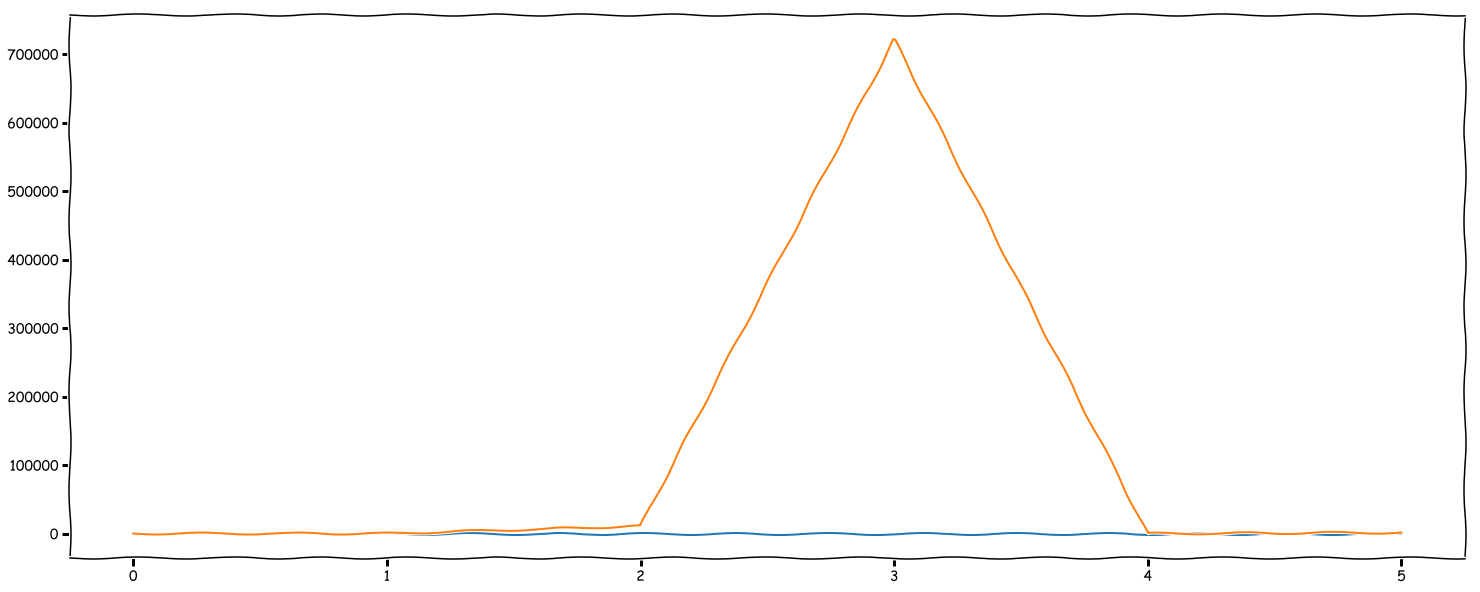

In [297]:
pf = pd.DataFrame()
for i in Auto.columns[:-1]:
    pf = pf.append([Auto[i].var()])


plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(pf.reset_index())

*Whoa! We need to standardise the variables!*

In [283]:
from sklearn.preprocessing import StandardScaler

In [284]:
scaler = StandardScaler()

In [288]:
import warnings
warnings.simplefilter('ignore')
scaler.fit(Auto.drop(columns='mpg01_1', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [291]:
scaled_features = scaler.transform(Auto.drop(columns='mpg01_1',axis=1))

In [292]:
Auto_scaled = pd.DataFrame(scaled_features,columns=Auto.columns[:-1])
Auto_scaled.head()

,mpg,cylinders,displacement,weight,acceleration,hp
0,-0.698638,1.483947,1.077290,0.620540,-1.285258,0.664133
1,-1.083498,1.483947,1.488732,0.843334,-1.466724,1.574594
2,-0.698638,1.483947,1.182542,0.540382,-1.648189,1.184397
3,-0.955212,1.483947,1.048584,0.536845,-1.285258,1.184397
4,-0.826925,1.483947,1.029447,0.555706,-1.829655,0.924265


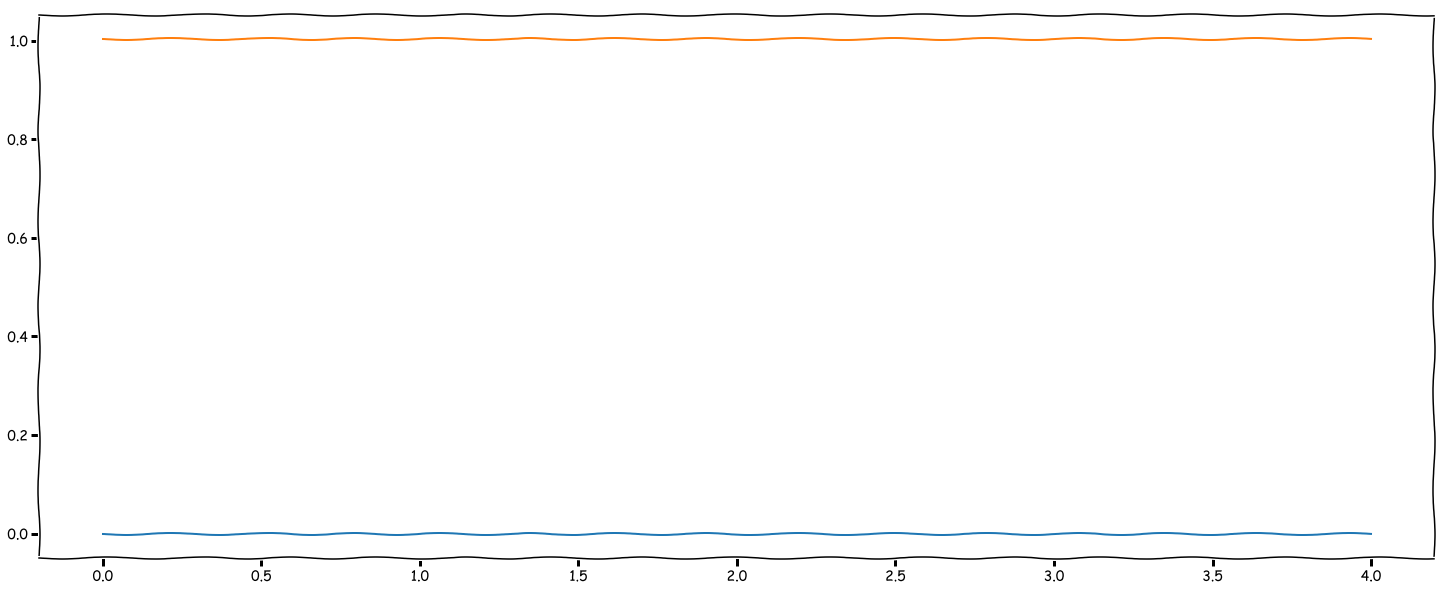

In [298]:
pf = pd.DataFrame()
for i in Auto_scaled.columns[:-1]:
    pf = pf.append([Auto_scaled[i].var()])


plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(pf.reset_index())

*Looks great! Now, I can proceed to the modelling phase.*

In [299]:
from sklearn.neighbors import KNeighborsClassifier

In [300]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [301]:
knnpred = knn.predict(X_test)

In [302]:
print(confusion_matrix(y_test, knnpred))

[[53 17]
 [ 2 58]]


In [303]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        70
           1       0.77      0.97      0.86        60

   micro avg       0.85      0.85      0.85       130
   macro avg       0.87      0.86      0.85       130
weighted avg       0.88      0.85      0.85       130



In [304]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

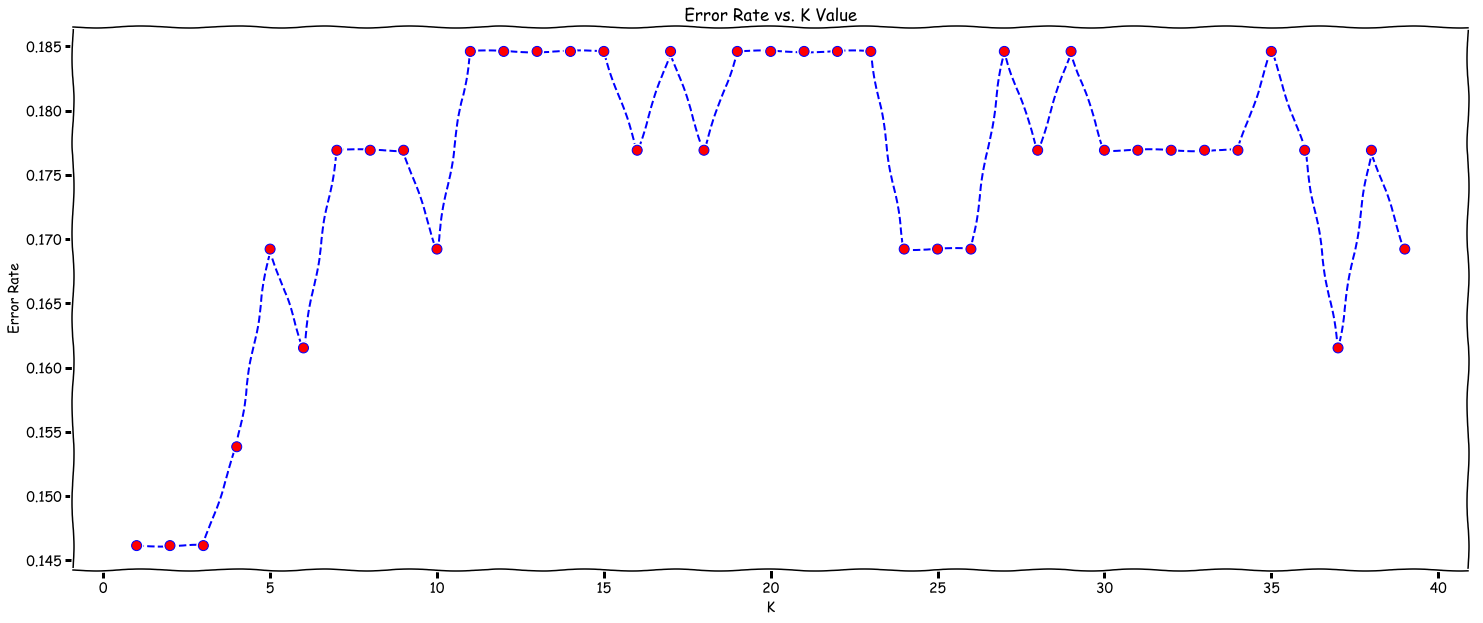

In [305]:
plt.xkcd()
plt.figure(figsize=(25,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

*As we can see, there is no point in modelling for K > 3, since the error rate increases drastically. This is primarily 
because the Bayesian Boundary is likely to be non-linear. Just to check, I will model with K = 3. However, I am not expecting any significant improvement in accuracy over K = 1.*

In [313]:
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [314]:
knnpred3 = knn3.predict(X_test)

In [315]:
print(confusion_matrix(y_test, knnpred3))

[[52 18]
 [ 1 59]]


In [316]:
print(classification_report(y_test, knnpred3))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85        70
           1       0.77      0.98      0.86        60

   micro avg       0.85      0.85      0.85       130
   macro avg       0.87      0.86      0.85       130
weighted avg       0.88      0.85      0.85       130



*As we can see, there is no significant change in model prediction accuracy. Now, for fun, let me do K = 11, which will highlight issues with overfitting a non-linear Bayesian Boundary.*

In [317]:
knn11 = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

In [318]:
knnpred11 = knn11.predict(X_test)

In [319]:
print(confusion_matrix(y_test, knnpred11))

[[47 23]
 [ 1 59]]


In [320]:
print(classification_report(y_test, knnpred11))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80        70
           1       0.72      0.98      0.83        60

   micro avg       0.82      0.82      0.82       130
   macro avg       0.85      0.83      0.81       130
weighted avg       0.86      0.82      0.81       130



*As we can see, there is a drastic reduction in model prediction accuracy due to overfitting of test data.*